In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

from tqdm import tqdm #optional, if you do not want to import remove tqdm() from loops!

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#
# Read the data
#
data = np.array(pd.read_csv("Data.csv"))
Y = data[:, 0].reshape((-1,1))
X = data[:, 1:]

#
# Apply some scaling because the value ranges are too big
#
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - np.amin(X[:,i])) / (np.amax(X[:,i]) - np.amin(X[:,i]))
Y = (Y - np.amin(Y)) / (np.amax(Y) - np.amin(Y))


#
# Optional: Maybe you find a better scaling alternative, try different approaches if you want
#

# a) Calculating the Pseudo-Inverse directly
Use numpy to calculate the Moore-Penrose pseudo-inverse and solve 

$min||XW-Y||_2$

In [3]:
W_pinv = np.linalg.pinv(X) @ Y
Y_pinv = X @ W_pinv

In [4]:
E_pinv = np.power(Y_pinv - Y, 1)


fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(E_pinv, bins=40, alpha=0.9, histtype='bar', ec='black',
        range=[-1,1], color="grey")
ax.set_xlabel("Prediction - Truth")
ax.set_ylabel("Counts")
ax.set_xlim([-1, 1])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)

# b) Calculating the Pseudo-Inverse by deriving the SVD

In [5]:
# Use the SVD components to derive the pseudo inverse.
U, S, V = np.linalg.svd(X, full_matrices=False)
S_inv = np.diag(1 / S)
X_pinv_svd = V.T @ S_inv @ U.T
W_svd = X_pinv_svd @ Y
Y_svd = X @ W_svd

diff = np.max(np.abs(Y_svd - Y_pinv))
print(f"Max difference between W_pinv and W_svd: {diff}")
print(X_pinv_svd.shape, Y.shape, S.shape)

Max difference between W_pinv and W_svd: 1.1102230246251565e-16
(12, 545) (545, 1) (12,)


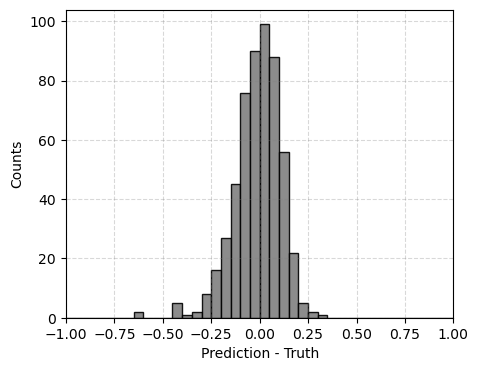

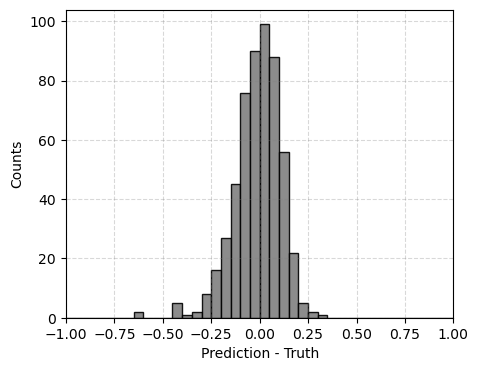

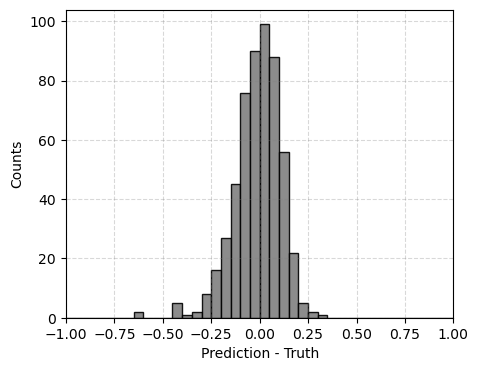

In [7]:
E_svd = np.power(X @ W_svd - Y,1)


fig, ax = plt.subplots(figsize=(5, 4))

ax.hist(E_svd, bins=40, alpha=0.9, histtype='bar', ec='black',
        range=[-1,1], color="grey")
ax.set_xlabel("Prediction - Truth")
ax.set_ylabel("Counts")
ax.set_xlim([-1, 1])
ax.grid(color='gray', linestyle='dashed', alpha=0.3)
plt.show()